In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import heapq



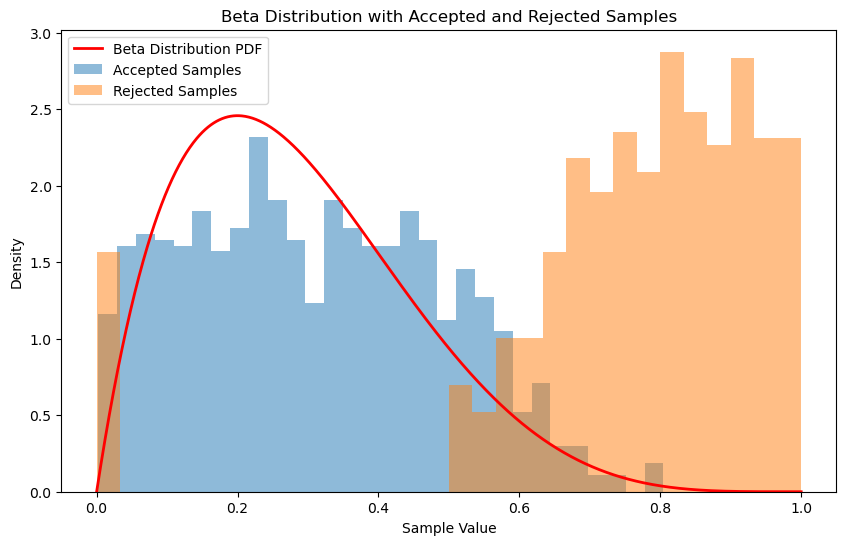

In [14]:
# question a
def beta_acceptance_rejection(alpha, beta, n_samples):
    target_dist = stats.beta(alpha, beta)
    proposal_dist = stats.uniform(0, 1)

    samples = []
    rejected = []
    while len(samples) < n_samples:
        x = proposal_dist.rvs()
        acceptance_prob = target_dist.pdf(x) / proposal_dist.pdf(x)

        if np.random.rand() < acceptance_prob:
            samples.append(x)
        else:
            rejected.append(x)
    
    return samples, rejected

# Generate samples
alpha = 2
beta = 5
n_samples = 1000
accepted, rejected = beta_acceptance_rejection(alpha, beta, n_samples)


# Plotting the distribution function along with accepted and rejected samples
x = np.linspace(0, 1, 1000)
y = stats.beta.pdf(x, alpha, beta)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', lw=2, label='Beta Distribution PDF')
plt.hist(accepted, bins=30, alpha=0.5, density=True, label='Accepted Samples')
plt.hist(rejected, bins=30, alpha=0.5, density=True, label='Rejected Samples')
plt.title('Beta Distribution with Accepted and Rejected Samples')
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [15]:
# question b
def lamp_on_off(matrix):
    """
    Check if there is a conductive path from the first to the last column of the matrix,
    considering up, down, and right movements.

    :param matrix: A 2D list representing the circuit with 1s and 0s.
    :return: 'On' if there is a path, otherwise 'Off'.
    """
    def is_valid(node):
        x, y = node
        return 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] == 1

    def get_neighbors(node):
        x, y = node
        directions = [(0, 1), (1, 0), (-1, 0)]  # Right, Down, Up
        neighbors = [(x + dx, y + dy) for dx, dy in directions]
        return [n for n in neighbors if is_valid(n)]

    def dijkstra(start):
        end_column = len(matrix[0]) - 1
        heap = [(0, start)]  # (cost, node)
        visited = set()
        while heap:
            cost, node = heapq.heappop(heap)
            if node in visited:
                continue
            visited.add(node)
            if node[1] == end_column:  # Check if we've reached the last column
                return True
            for neighbor in get_neighbors(node):
                if neighbor not in visited:
                    heapq.heappush(heap, (cost + 1, neighbor))
        return False

    # Check for a path from each conductive position in the first column
    for x in range(len(matrix)):
        if matrix[x][0] == 1:  # Start only from conductive cells in the first column
            start = (x, 0)
            if dijkstra(start):
                return 'On'
        
    return 'Off'



Naive Estimator: Mean = 0.06124226544933551, SD = 0.004284552199182101, Variance = 1.8357387547516177e-05, MSE = 1.8357387547516177e-05
Conditional Estimator: Mean = 0.06224514285714286, SD = 0.0037632707875474704, Variance = 1.4162207020408157e-05, MSE = 1.4162207020408157e-05


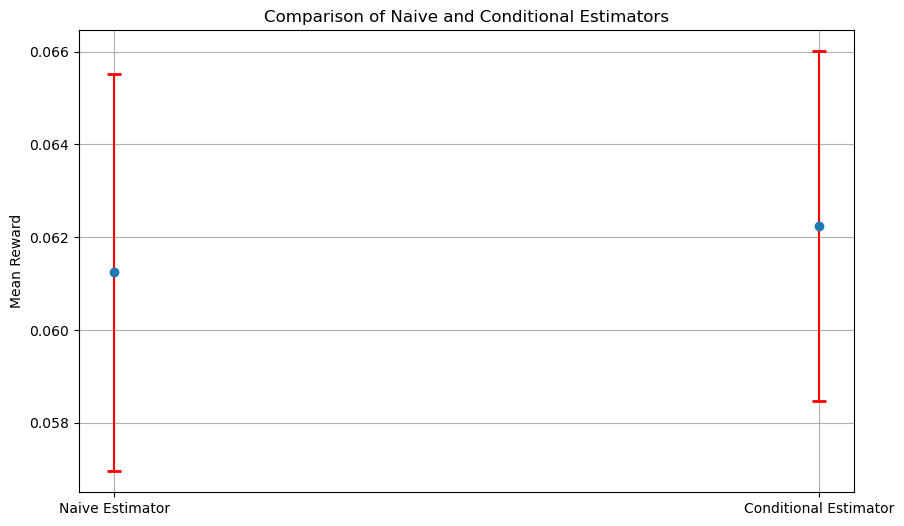

In [16]:
# question c

# Assuming matrix size and Beta distribution parameters
matrix_size = (5, 6)
alpha, beta = 2, 5
num_simulations = 100  # Number of simulations for comparison
num_steps = 10000  # Number of steps in each simulation

def simulate_naive_estimator(num_steps, matrix_size):
    matrix = np.zeros(matrix_size, dtype=int)
    total_reward = 0
    for _ in range(num_steps):
        # Randomly choose a switch to reset
        x, y = random.randint(0, matrix_size[0] - 1), random.randint(0, matrix_size[1] - 1)
        matrix[x][y] = 1 - matrix[x][y]
        if lamp_on_off(matrix) == 'On':
            reward = np.random.beta(alpha, beta)
        else:
            reward = 0
        total_reward += reward
    return total_reward / num_steps

def estimate_lamp_on_probability(num_steps, matrix_size):
    matrix = np.zeros(matrix_size, dtype=int)
    lamp_on_count = 0
    for _ in range(num_steps):
        x, y = random.randint(0, matrix_size[0] - 1), random.randint(0, matrix_size[1] - 1)
        matrix[x][y] = 1 - matrix[x][y]
        if lamp_on_off(matrix) == 'On':
            lamp_on_count += 1
    return lamp_on_count / num_steps

def calculate_conditional_expected_reward(num_steps, matrix_size, alpha, beta):
    lamp_on_probability = estimate_lamp_on_probability(num_steps, matrix_size)
    expected_reward_on = alpha / (alpha + beta)
    return lamp_on_probability * expected_reward_on

# Running the simulations and collecting results
naive_rewards = [simulate_naive_estimator(num_steps, matrix_size) for _ in range(num_simulations)]
conditional_rewards = [calculate_conditional_expected_reward(num_steps, matrix_size, alpha, beta) for _ in range(num_simulations)]

# Calculating means, variances, and MSE
naive_mean = np.mean(naive_rewards)
naive_sd = np.std(naive_rewards)
naive_variance = np.var(naive_rewards)
naive_mse = np.mean((np.array(naive_rewards) - naive_mean)**2)

conditional_mean = np.mean(conditional_rewards)
conditional_sd = np.std(conditional_rewards)
conditional_variance = np.var(conditional_rewards)
conditional_mse = np.mean((np.array(conditional_rewards) - conditional_mean)**2)

# Printing results
print(f"Naive Estimator: Mean = {naive_mean}, SD = {naive_sd}, Variance = {naive_variance}, MSE = {naive_mse}")
print(f"Conditional Estimator: Mean = {conditional_mean}, SD = {conditional_sd}, Variance = {conditional_variance}, MSE = {conditional_mse}")

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=['Naive Estimator', 'Conditional Estimator'], 
             y=[naive_mean, conditional_mean], 
             yerr=[naive_sd, conditional_sd], 
             fmt='o', capsize=5, capthick=2, ecolor='red')
plt.title('Comparison of Naive and Conditional Estimators')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.show()


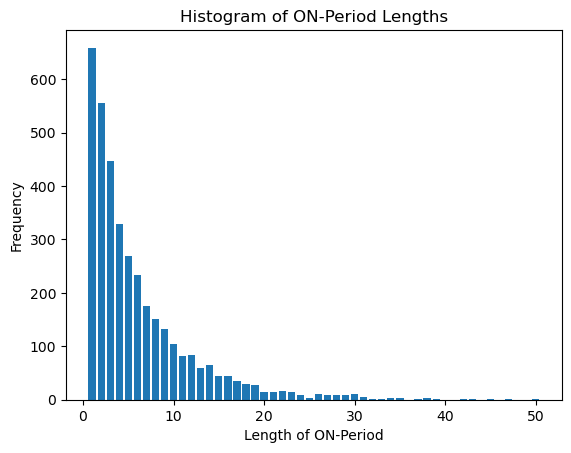

In [17]:
# question d

def simulate_on_periods(num_steps, matrix_size):
    matrix = np.zeros(matrix_size, dtype=int)
    on_periods = []
    on_period_length = 0
    lamp_was_on = False

    for _ in range(num_steps):
        # Randomly choose a switch to reset
        x, y = random.randint(0, matrix_size[0] - 1), random.randint(0, matrix_size[1] - 1)
        matrix[x][y] = 1 - matrix[x][y]

        if lamp_on_off(matrix) == 'On':
            if not lamp_was_on:
                # Lamp just turned on, start a new ON-period
                on_period_length = 1
                lamp_was_on = True
            else:
                # Lamp continues to be on, increase ON-period length
                on_period_length += 1
        else:
            if lamp_was_on:
                # Lamp just turned off, end the current ON-period
                on_periods.append(on_period_length)
                lamp_was_on = False

    return on_periods

# Simulate the ON-periods
num_steps = 100000  # Adjust as needed
matrix_size = (5, 6)  # As per your assignment
on_periods = simulate_on_periods(num_steps, matrix_size)

# Plotting the histogram of ON-period lengths
plt.hist(on_periods, bins=range(1, max(on_periods)+1), align='left', rwidth=0.8)
plt.title('Histogram of ON-Period Lengths')
plt.xlabel('Length of ON-Period')
plt.ylabel('Frequency')
plt.show()


In [18]:
# question e

# Parameters
num_steps = 300000  # Adjust for a more precise estimation
matrix_size = (5, 6)
batch_size = 10000  # Determine a suitable batch size

# Simulation
on_periods = simulate_on_periods(num_steps, matrix_size)
batch_means_EA = [np.mean(on_periods[i:i + batch_size]) for i in range(0, len(on_periods), batch_size)]
batch_means_Prob = [np.mean([length > 20 for length in on_periods[i:i + batch_size]]) for i in range(0, len(on_periods), batch_size)]

# Estimations
EA_estimate = np.mean(batch_means_EA)
Prob_estimate = np.mean(batch_means_Prob)

# Variance and Confidence Intervals
variance_EA = np.var(batch_means_EA, ddof=1)
variance_Prob = np.var(batch_means_Prob, ddof=1)
ci_EA = stats.norm.interval(0.95, loc=EA_estimate, scale=np.sqrt(variance_EA/len(batch_means_EA)))
ci_Prob = stats.norm.interval(0.95, loc=Prob_estimate, scale=np.sqrt(variance_Prob/len(batch_means_Prob)))

# Output results
print(f"Estimated E[A]: {EA_estimate} with 95% CI: {ci_EA}")
print(f"Estimated Prob[A > 20]: {Prob_estimate} with 95% CI: {ci_Prob}")

Estimated E[A]: 6.352180758807588 with 95% CI: (5.765013261083535, 6.939348256531641)
Estimated Prob[A > 20]: 0.047877777777777776 with 95% CI: (0.032829609852031365, 0.0629259457035242)


In [19]:
# question f

# Simulation parameters
num_steps = 100000
matrix_size = (5, 6)

# Run simulation
on_periods = simulate_on_periods(num_steps, matrix_size)

# Analyze consecutive ON-period lengths
if len(on_periods) > 1:
    An = on_periods[:-1]  # Lengths of nth ON-period
    An_plus_1 = on_periods[1:]  # Lengths of (n+1)th ON-period

    # Calculate covariance
    covariance = np.cov(An, An_plus_1)[0, 1]

    print(f"Covariance between consecutive ON-periods: {covariance}")

    # Check for independence (Covariance close to zero)
    if np.isclose(covariance, 0, atol=1e-3):
        print("The sequence An may form a Markov chain (based on covariance analysis).")
    else:
        print("The sequence An may not form a Markov chain (based on covariance analysis).")
else:
    print("Not enough data for analysis.")


Covariance between consecutive ON-periods: 0.24679059924298513
The sequence An may not form a Markov chain (based on covariance analysis).
